In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

file_name = './citibike-stations.csv'
xcol = 'capacity'
ycol = 'num_bikes_available'
xcolt = xcol + '_t'
ycolt = ycol + '_t'


# this is my helper function to help deal with the times
def hr_min_to_dec(st):
    hr = int(st[:st.find(':')])
    mi = int(st[st.find(':') + 1:])/60
    return str(hr + mi)

data = pd.read_csv(file_name, usecols=[xcol, ycol]);

# I also only want to use data for the number of people injured or number of people killed, and will cluster on those
# data = data.transform({'CRASH TIME': hr_min_to_dec , 'NUMBER OF PERSONS KILLED': lambda x : x, 'NUMBER OF PERSONS INJURED': lambda x : x, 'NUMBER OF MOTORIST INJURED': lambda x : x}, axis=0)

# the last step made all of the crash times stringy, so lets undo that now
# data['CRASH TIME'] = data['CRASH TIME'].map(float)

data

,capacity,num_bikes_available
0,29,2
1,57,2
2,62,2
3,51,12
4,80,35
...,...,...
1797,21,7
1798,66,15
1799,29,1
1800,21,1


In [3]:
# remove any NaN's
data.dropna(inplace=True)
data

,capacity,num_bikes_available
0,29,2
1,57,2
2,62,2
3,51,12
4,80,35
...,...,...
1797,21,7
1798,66,15
1799,29,1
1800,21,1


In [4]:
data.describe()

,capacity,num_bikes_available
count,1802.000000,1802.000000
mean,30.956160,11.933962
std,17.046749,13.884131
min,0.000000,0.000000
25%,21.000000,2.000000
50%,25.000000,7.000000
75%,37.000000,18.000000
max,123.000000,80.000000


In [5]:
# scale our inputs
scaler = StandardScaler()
data[[xcolt, ycolt]] = scaler.fit_transform(data[[xcol, ycol]])
data

,capacity,num_bikes_available,capacity_t,num_bikes_available_t
0,29,2,-0.114785,-0.715689
1,57,2,1.528213,-0.715689
2,62,2,1.821606,-0.715689
3,51,12,1.176142,0.004758
4,80,35,2.877819,1.661785
...,...,...,...,...
1797,21,7,-0.584212,-0.355466
1798,66,15,2.056320,0.220892
1799,29,1,-0.114785,-0.787734
1800,21,1,-0.584212,-0.787734


In [6]:
# create number of clusters

def optimize_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init=3)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Num clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

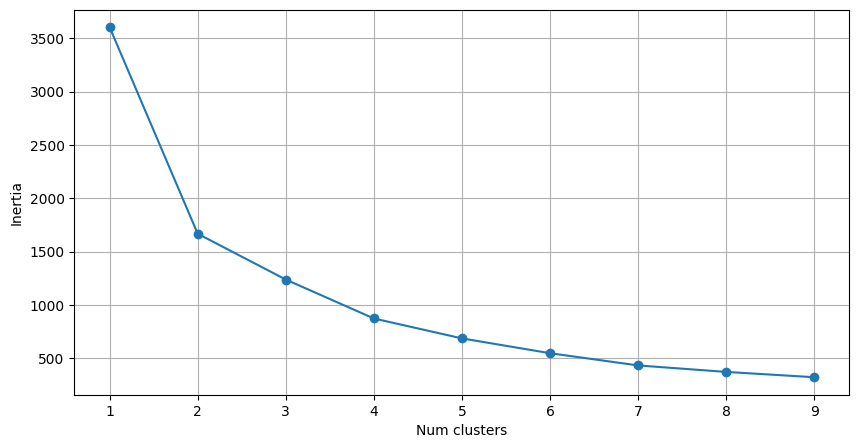

In [6]:
optimize_k_means(data[[xcolt, ycolt]], 10)

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[[xcolt, ycolt]])
k2means = KMeans(n_clusters=5)
k2means.fit(data[[xcolt, ycolt]])
data['3k'] = kmeans.labels_
data['5k'] = k2means.labels_

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
data

,capacity,num_bikes_available,capacity_t,num_bikes_available_t,3k,5k
0,29,2,-0.114785,-0.715689,0,2
1,57,2,1.528213,-0.715689,1,3
2,62,2,1.821606,-0.715689,1,3
3,51,12,1.176142,0.004758,1,3
4,80,35,2.877819,1.661785,2,1
...,...,...,...,...,...,...
1797,21,7,-0.584212,-0.355466,0,2
1798,66,15,2.056320,0.220892,1,3
1799,29,1,-0.114785,-0.787734,0,2
1800,21,1,-0.584212,-0.787734,0,2


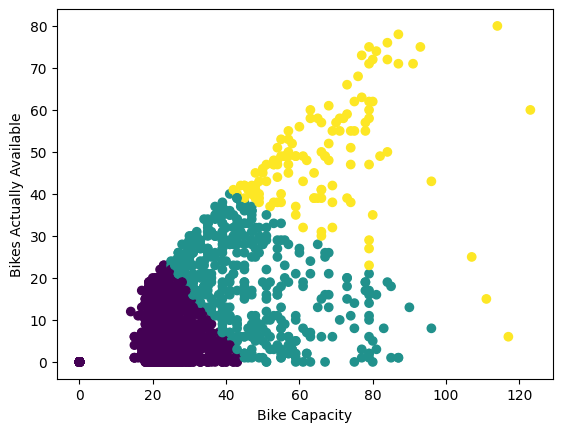

In [9]:
plt.scatter(x=data[xcol], y=data[ycol], c=data['3k'])
plt.xlabel('Bike Capacity')
plt.ylabel('Bikes Actually Available')
plt.show()


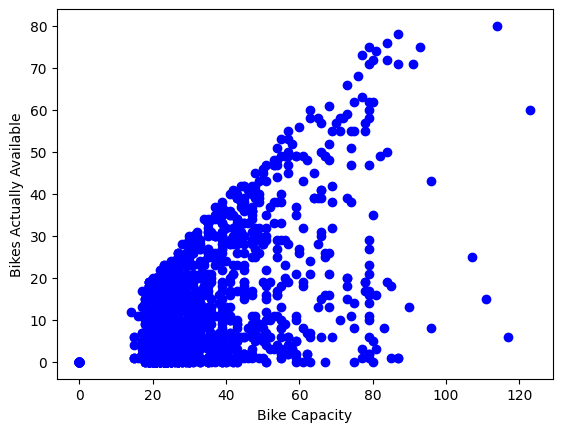

In [10]:
plt.scatter(x=data[xcol], y=data[ycol], c="blue")
plt.xlabel('Bike Capacity')
plt.ylabel('Bikes Actually Available')
plt.show()

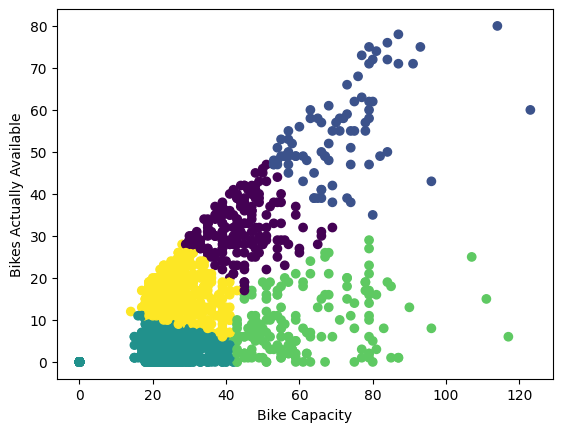

In [10]:
plt.scatter(x=data[xcol], y=data[ycol], c=data['5k'])
plt.xlabel('Bike Capacity')
plt.ylabel('Bikes Actually Available')
plt.show()


/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


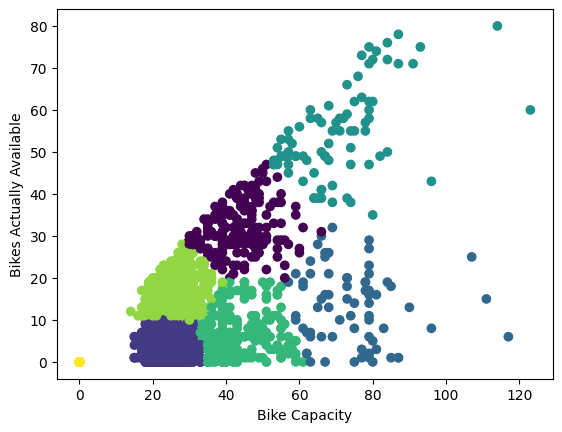

In [11]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(data[[xcolt, ycolt]])
data['7k'] = kmeans.labels_
plt.scatter(x=data[xcol], y=data[ycol], c=data['7k'])
plt.xlabel('Bike Capacity')
plt.ylabel('Bikes Actually Available')
plt.show()